In [342]:
#1 Lendo o dataset Churn_Modelling_2.csv

import pandas as pd

!git clone "https://github.com/malegopc/DSBD"
dataset = pd.read_csv("/content/DSBD/Datasets/Churn/Churn_Modelling_2.csv")
dataset

fatal: destination path 'DSBD' already exists and is not an empty directory.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


In [343]:
#2 Eliminando as instâncias vazias da variável 'isActiveMember'

dataset['IsActiveMember'].dropna(inplace= True)
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,10


In [344]:
#3 Preenchendo os dados vazios da coluna 'NumOfProducts' usando a média

columm_mean = dataset['NumOfProducts'].mean()
dataset['NumOfProducts'] = dataset['NumOfProducts'].fillna(value = columm_mean)

columm_mean = dataset['IsActiveMember'].mean()
dataset['IsActiveMember'] = dataset['IsActiveMember'].fillna(value = columm_mean)


dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [345]:
#4 pegando apenas as colunas importantes do dataset

df = dataset.iloc[:, 3:13]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88
1,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58
2,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57
3,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63
4,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64
9996,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77
9997,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58
9998,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52


In [346]:
#5 criando a variável target

target = dataset.iloc[:, 13]
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [347]:
#6 Codificando a variável 'Gender' para numérica utilizando LabelEncoder

from sklearn.preprocessing import LabelEncoder

z = df['Gender']
le = LabelEncoder()
le.fit(z)
z_encoder = le.transform(z)

df['Gender'] = z_encoder
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1.0,1,1.0,101348.88
1,608,Spain,0,41,1,83807.86,1.0,0,1.0,112542.58
2,502,France,0,42,8,159660.80,3.0,1,0.0,113931.57
3,699,France,0,39,1,0.00,2.0,0,0.0,93826.63
4,850,Spain,0,43,2,125510.82,1.0,1,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2.0,1,0.0,96270.64
9996,516,France,1,35,10,57369.61,1.0,1,1.0,101699.77
9997,709,France,0,36,7,0.00,1.0,0,1.0,42085.58
9998,772,Germany,1,42,3,75075.31,2.0,1,0.0,92888.52


In [348]:
# 7 Codificando a variável 'Geography' para numérica
# utilizando make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

enc = make_column_transformer(
    (OneHotEncoder(), ['Geography'])
)
enc.fit(df)
encoder = enc.transform(df)

print(encoder)
df['Geography'] = encoder
df

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1.0,0,42,2,0.00,1.0,1,1.0,101348.88
1,608,0.0,0,41,1,83807.86,1.0,0,1.0,112542.58
2,502,1.0,0,42,8,159660.80,3.0,1,0.0,113931.57
3,699,1.0,0,39,1,0.00,2.0,0,0.0,93826.63
4,850,0.0,0,43,2,125510.82,1.0,1,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1.0,1,39,5,0.00,2.0,1,0.0,96270.64
9996,516,1.0,1,35,10,57369.61,1.0,1,1.0,101699.77
9997,709,1.0,0,36,7,0.00,1.0,0,1.0,42085.58
9998,772,0.0,1,42,3,75075.31,2.0,1,0.0,92888.52


In [349]:
#8 Divindo entre train e test

from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:10].values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [350]:
#9 Aplicando a padronização(escalonamento) na X_train
#utilizando standardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TAREFA 5.2


In [351]:
from sklearn.datasets import load_iris
iris = load_iris()
class_names = iris.target_names
X = iris.data
y = iris.target

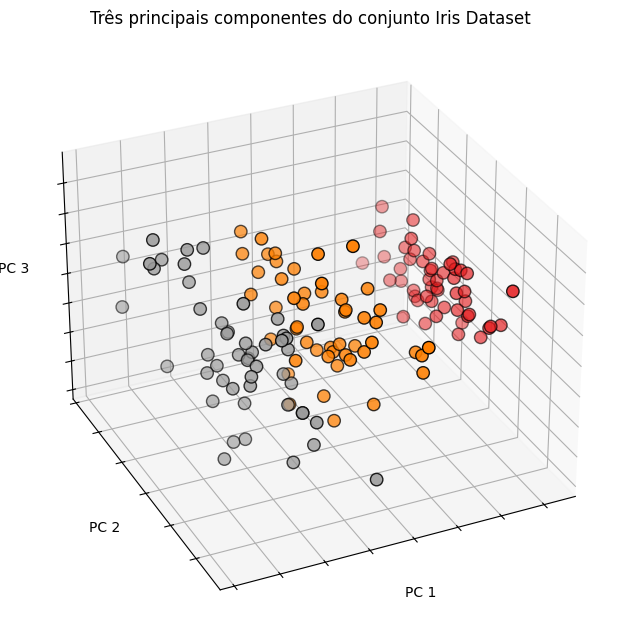

In [352]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d", elev=-150, azim=115)
ax.set_position([0, 0, 0.95, 1])
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=80)

ax.set_title("Três principais componentes do conjunto Iris Dataset")
ax.set_xlabel("PC 1")

ax.xaxis.set_ticklabels([])
ax.set_ylabel("PC 2")

ax.yaxis.set_ticklabels([])
ax.set_zlabel("PC 3")

ax.zaxis.set_ticklabels([])
plt.show()

In [353]:
#Divide entre teste e treino

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

--- REGRESSÂO LOGÍSTICA ---

Taxa de acerto =  81.08 %

Matriz de confusão:



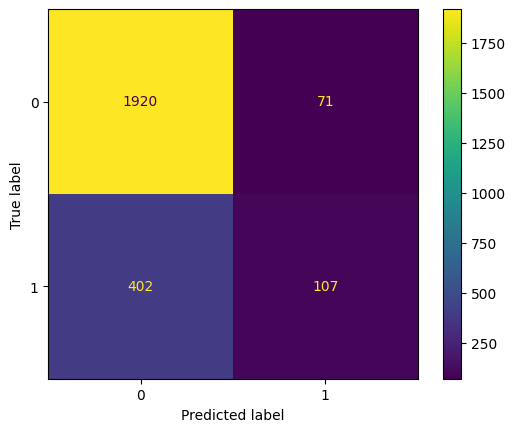

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)
acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)

print('--- REGRESSÂO LOGÍSTICA ---\n')

print('Taxa de acerto = ', round(acertos_LogReg*100,2),"%\n")

print('Matriz de confusão:\n')
cm_logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

plt.show()

--- KNN | K-NEAREST NEIGHBORS ---

Taxa de acerto =  83.76 %

Matriz de confusão:



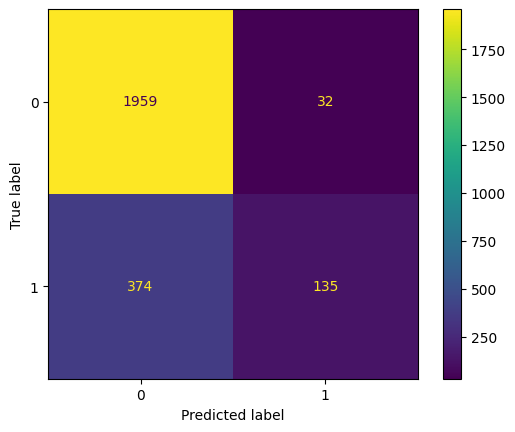

In [355]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)

print('--- KNN | K-NEAREST NEIGHBORS ---\n')

print('Taxa de acerto = ', round(acertos_knn*100,2),"%\n")

print('Matriz de confusão:\n')
cm_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

plt.show()

--- SVM | SUPPORT VECTOR MACHINES

Taxa de acerto =  86.08 %

Matriz de confusão:



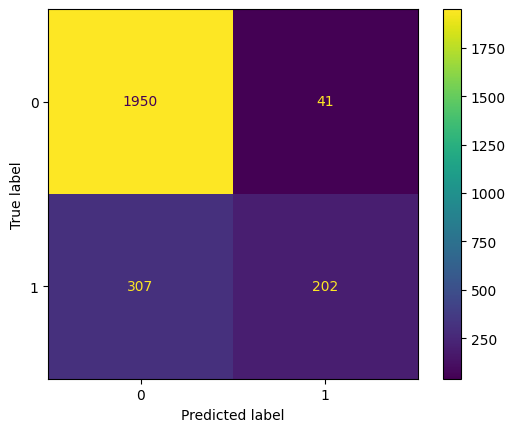

In [356]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)
acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print("--- SVM | SUPPORT VECTOR MACHINES\n")

print('Taxa de acerto = ', round(acertos_svm*100,2),"%\n")

print('Matriz de confusão:\n')
cm_svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

plt.show()